# PDF Analyser AI

In [9]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

## 1 - Shapping dataset

In [10]:
path_folder = "../../DataSamples/PDFs/"
df_safe = pd.DataFrame(pd.read_excel(path_folder + "safe_pdf_dataset_long.xlsx"))
df_infected = pd.DataFrame(pd.read_excel(path_folder + "infected_pdf_dataset_long.xlsx"))

df_safe.drop(columns=df_safe.columns[0], axis=1, inplace=True)
df_infected.drop(columns=df_infected.columns[0], axis=1, inplace=True)

df_safe["isSafe"] = 1
df_infected["isSafe"] = 0

df = pd.concat([df_safe, df_infected])

df.head()

,file_name,isAValidPDF,pdf_version,obj,endobj,stream,endstream,xref,trailer,startxref,...,OpenAction,AcroForm,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,Colors,URI,isSafe
0,1561.pdf,1,4,12,12,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,729.pdf,1,5,33,33,10,10,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2,2079.pdf,1,5,13,13,12,12,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,595.pdf,1,4,10,10,5,5,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,2264.pdf,1,6,23,23,11,11,1,1,1,...,1,0,0,0,0,0,0,0,0,1


## Visualize Data

(0.0, 100.0)

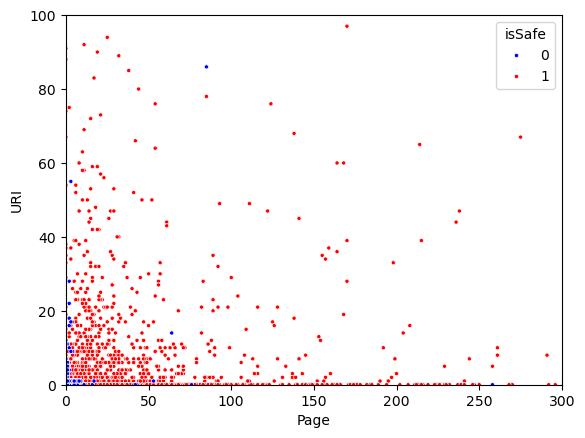

In [11]:
res = sns.scatterplot(data=df, x='Page', y='URI', hue='isSafe',marker='.', palette=['blue','red'])
res.set_xlim([0, 300])
res.set_ylim([0, 100])

## RF Classifier

/home/kiki/.local/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


<AxesSubplot: >

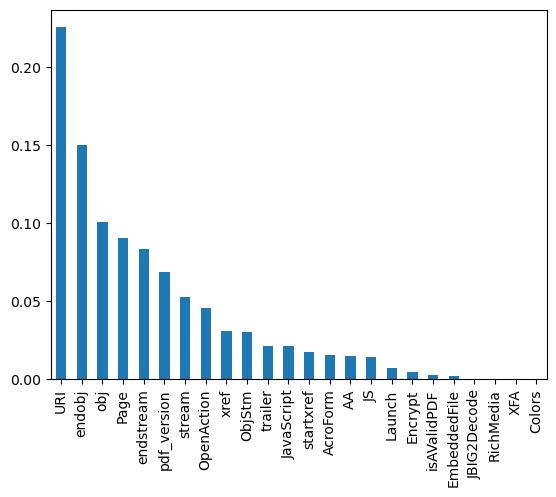

In [12]:
bank_train, bank_test = train_test_split(df, test_size = 0.3, random_state = 50)

r_f = RandomForestClassifier(n_estimators=15, random_state=0, oob_score=True)
r_f.fit(bank_train.iloc[:,1:-1], bank_train.isSafe)

feature_importances = pd.Series(r_f.feature_importances_, index=bank_train.columns[1:-1]).sort_values(ascending=False)

feature_importances.plot.bar()

## Test Modele

In [13]:
print(r_f.oob_score_)
print(r_f.score(bank_test.iloc[:,1:25], bank_test.iloc[:,25:26]))

0.9711678832116788
0.9761702127659575


## Export Random Forest object

In [14]:
joblib.dump(r_f, "random_forest_weight_v2.joblib")
# loaded_rf = joblib.load("random_forest_weight_v2.joblib")
# loaded_rf.predict(bank_test.iloc[:,1:25], )
# loaded_rf.predict_proba(df_infected.iloc[:,1:25])

['random_forest_weight_v2.joblib']